##### https://github.com/1adrianb/face-alignment

In [ ]:
!pip install face-alignment

In [ ]:
import os
import cv2
import numpy as np
import face_alignment
from skimage import io

# for cv2 display
from google.colab.patches import cv2_imshow

# for downloading lmk files
from google.colab import files

In [ ]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, flip_input=False)

Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100%|██████████| 85.7M/85.7M [00:12<00:00, 7.24MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-cd938726ad.zip" to /root/.cache/torch/hub/checkpoints/2DFAN4-cd938726ad.zip
100%|██████████| 91.9M/91.9M [00:12<00:00, 7.51MB/s]


In [ ]:
target_img_path = "./sad_small.jpg"
all_68_lmks = False
visualize = True
download = False

In [ ]:
basename = os.path.splitext(os.path.basename(target_img_path))[0]
if all_68_lmks:
    target_lmk_path = "./output/" + basename + "_lmks_68.npy"
else:
    target_lmk_path = "./output/" + basename + "_lmks_51.npy"

In [ ]:
input = io.imread(target_img_path)
target_lmks = fa.get_landmarks(input)
if not all_68_lmks:
    target_lmks = target_lmks[0][17:]

FileNotFoundError: ignored

In [ ]:
np.save(target_lmk_path, target_lmks)
if download:
    files.download(target_lmk_path)

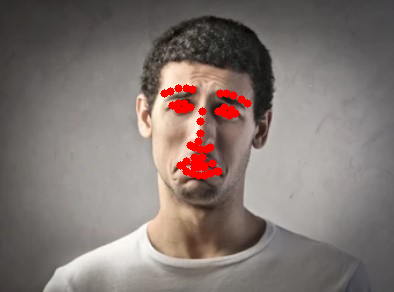

In [ ]:
if visualize:
    plt_target_lmks = target_lmks.copy()
    # for flipping y coords
    # plt_target_lmks[:, 1] = target_img.shape[0] - plt_target_lmks[:, 1]

    target_img = cv2.imread(target_img_path)
    for (x, y) in plt_target_lmks:
        cv2.circle(target_img, (int(x), int(y)), 4, (0, 0, 255), -1)
    cv2_imshow(target_img)

    # for local running
    # cv2.imshow('img', target_img)
    # if (cv2.waitKey(0) & 0xFF) == ord('q'):
    #     cv2.destroyAllWindows()